In [ ]:
#Ebizzy benchmark méréseket feldolgozó python program (Több processzor magot igényel, webszerver terhelést, próbál imitálni)
#Az egyes részek alatt található a leírás hogy éppen mit szeretnék megjeleníteni az eredményekből
#Itt az összes benchmark fix ideig futott, és jobb eredménynek számít az ha ezalatt az idő alatt több request-et tudott elvégezni.
#140.000-nél találhatók a legjobb értékek, és ezek egészen 115796(request/20sec) ig mozognak(amik már rossznak számítanak)

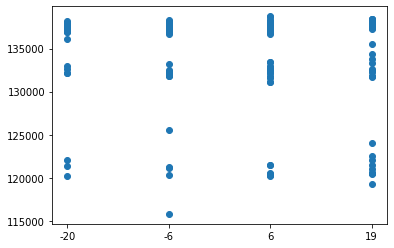

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
rtime = []
prio = []
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    prio.append(i["parameters"]["prio"])
    min = i["results"][0]
    for j in i["results"]:
        if (j<min):
            min = j
    rtime.append(min)
plt.plot(prio,rtime,"o")
plt.show()
#Itt az öt futási mintából a legjobbat választottam ki, x-priority(mozgó paraméter, többi rögzített) y-runtime

In [4]:
import json
f = open("ertekek.json")
data = json.load(f)
best=[]
worst=[]
max = data["measurements"][0]["results"][0]
min = data["measurements"][0]["results"][0]
for i in data["measurements"]:
    for j in i["results"]:
        if(j<min):
            min=j
        if(j>max):
            max=j

for i in data["measurements"]:
    found=False
    mfound=False
    for j in i["results"]:
        if(j==min):
            mfound=True
        if(j==max):
            found=True
    if(found):
        best.append(i)
    if(mfound):
        worst.append(i)
print("most requests/20sec: ",max,"\n",best)
print("least requests/20sec: ",min,"\n",worst)
#A legjobb futási eredmény és annak beállításai:
#Ami itt látható hogy viszonylag nagy a szórás a minták között, a legjobbnál például szerepel 141396(ami csúcs eredmény)-132137(egészen átlagos)

most requests/20sec:  141396 
 [{'parameters': {'latency': '1000000000', 'min_gran': '1000000000', 'wakeup_gran': '666666666', 'prio': '6'}, 'results': [141396, 138946, 138398, 132137, 138553]}]
least requests/20sec:  115796 
 [{'parameters': {'latency': '333400000', 'min_gran': '1000000000', 'wakeup_gran': '1000000000', 'prio': '-6'}, 'results': [138041, 115796, 138227, 139254, 137707]}]


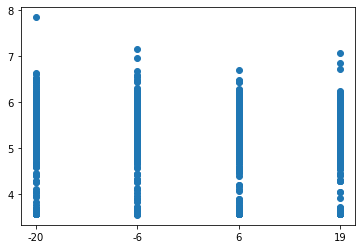

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np
rtime = []
prio = []
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    for k in range(5):
        prio.append(i["parameters"]["prio"])
    for j in i["results"]:
        rtime.append(j)
plt.plot(prio,rtime,"o")
plt.show()
#Az összes minta szerepel a grafikonon, a hozzá társuló Priority paraméterrel

140,000Requests/20mp:

 -20 : 	 4 db 
  -6 : 	 6 db 
   6 : 	 5 db 
  19 : 	 4 db

										 138,000Requests/20mp:

 										 -20 : 	 68 db 
 										  -6 : 	 87 db 
 										   6 : 	 134 db 
 										  20 : 	 132 db


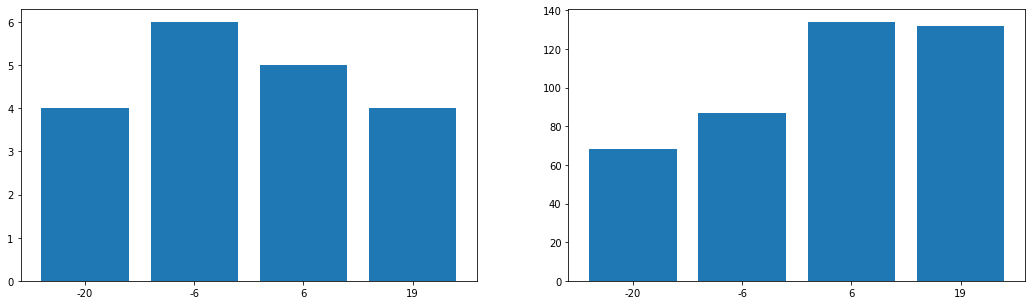

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(18,5)) # set the size - figsize(width, height)
first=0
second=0
third=0
forth=0
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    count=0
    for j in i["results"]:
        if(j>140000):
            count+=1
    if(i["parameters"]["prio"]=="-20"):
        first+=count
    elif(i["parameters"]["prio"]=="-6"):
        second+=count
    elif(i["parameters"]["prio"]=="6"):
        third+=count
    elif(i["parameters"]["prio"]=="19"):
        forth+=count
print("140,000Requests/20mp:\n\n","-20 : \t",first,"db","\n"," -6 : \t",second,"db","\n","  6 : \t",third,"db","\n"," 19 : \t",forth,"db\n")
mylabels=np.array(["-20","-6","6","19"])
y = np.array([first,second,third,forth])
plt.subplot(1, 2, 1)
plt.bar(mylabels,y )
first=0
second=0
third=0
forth=0
for i in data["measurements"]:
    count=0
    for j in i["results"]:
        if(j>138000):
            count+=1
    if(i["parameters"]["prio"]=="-20"):
        first+=count
    elif(i["parameters"]["prio"]=="-6"):
        second+=count
    elif(i["parameters"]["prio"]=="6"):
        third+=count
    elif(i["parameters"]["prio"]=="19"):
        forth+=count
print("\t"*10,"138,000Requests/20mp:\n\n","\t"*10,"-20 : \t",first,"db","\n","\t"*10," -6 : \t",second,"db","\n","\t"*10,"  6 : \t",third,"db","\n","\t"*10," 20 : \t",forth,"db")
mylabels=np.array(["-20","-6","6","19"])
y = np.array([first,second,third,forth])
plt.subplot(1, 2, 2)
plt.bar(mylabels,y )

plt.show()
#Itt az figyelhető meg, hogy adott beállításon, mennyi olyan minta volt amely legalább 140,000kérést végzett el 20 mp alatt.
#Ez a 140,000 érték elég magas és jónak számít, látható hogy az 1280 mintából, csak pár darab került ide(140.000fölötti kategóriába).
#Itt a ezt a leírást sajnos ilyen csúnyán sikerült még megcsinálnom(későbbiekben javítom), de magáról az oszlop diagrammról is beazonosíthatók. 